<a href="https://colab.research.google.com/github/Tanayshah29/Churn_Modelling/blob/main/Churn_Modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/Churn_Modelling.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Display the first 5 rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


So, Our aim is to predict or classify whether the customer will be exciting in the future or not (0 or 1). So, that the bank can give them some benefits prior to them taking the decision of exiting from the bank

In [4]:
# Clearly it can be seen that first 3 columns makes no sense in classification so just removing the 3 columns from the independent features list
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
#Since we can see the 2 columns Geography and Gender as categorical we can make them dummie features.
geography = pd.get_dummies(X['Geography'], drop_first= True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [8]:
#Then Concatenate the dummie columns with our X- independent features
X =pd.concat([X,geography,gender], axis=1)

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
#Now lets drop the Geography and Gender columns it's of no use.
X = X.drop(columns=['Geography', 'Gender'], axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
#Splitting the datset into test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(8000, 11)

In [14]:
X_test.shape

(2000, 11)

In [15]:
y_train.shape

(8000,)

In [16]:
y_test.shape

(2000,)

In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Now it's time to make our ANN and so these are the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ELU, PReLU
from keras.layers import Dropout

So, After initializing the Sequential(), it will have my empty neural network with no neurons

In [19]:
#Initializing the ANN
classifier =  Sequential()

In [21]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer='he_uniform', activation='relu', input_dim = 11))

In [22]:
#Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer='he_uniform', activation='relu')) 

In [23]:
#Adding the output layer
classifier.add(Dense( units= 1, kernel_initializer='glorot_uniform', activation='sigmoid')) 

In [24]:
#Now let's see the summary of the neural network so far
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#Fitting the ann to the training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6305 - accuracy: 0.7962 - val_loss: 0.5348 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5010 - accuracy: 0.7962 - val_loss: 0.4869 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4656 - accuracy: 0.7962 - val_loss: 0.4624 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4470 - accuracy: 0.7962 - val_loss: 0.4491 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4375 - accuracy: 0.7962 - val_loss: 0.4428 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4329 - accuracy: 0.7960 - val_loss: 0.4388 - val_accuracy: 0.7989
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4296 - accuracy: 0.8076 - val_loss: 0.4358 - val_accuracy: 0.8073

In [30]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


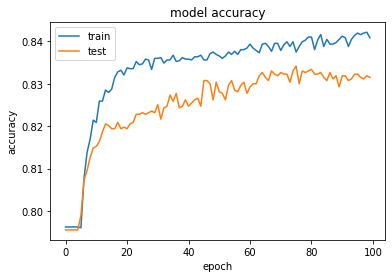

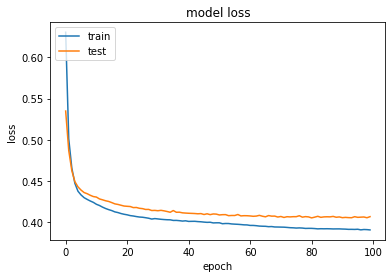

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [35]:
cm

array([[1550,   45],
       [ 274,  131]])

In [36]:
score

0.8405

In [37]:
#SO, our ANN is giving 84.05 % Accuracy on our test data which is really great

In [44]:
#Now let's do trails on our model
# Initialising the ANN
classifier1 = Sequential()

# Adding the input layer and the first hidden layer
classifier1.add(Dense(units= 20, kernel_initializer='he_normal', activation='relu', input_dim = 11))

# Adding the second hidden layer
classifier1.add(Dense(units= 15,kernel_initializer= 'he_normal',activation='relu'))

# Adding the third hidden layer
classifier1.add(Dense(units= 10, kernel_initializer= 'he_normal',activation='relu'))

# Adding the output layer
classifier1.add(Dense(units=  1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier1.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history1=classifier1.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5193 - accuracy: 0.7794 - val_loss: 0.4924 - val_accuracy: 0.7936
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.7957 - val_loss: 0.4722 - val_accuracy: 0.7989
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4609 - accuracy: 0.7996 - val_loss: 0.4614 - val_accuracy: 0.7997
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4480 - accuracy: 0.8029 - val_loss: 0.4538 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4382 - accuracy: 0.8074 - val_loss: 0.4477 - val_accuracy: 0.8061
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4303 - accuracy: 0.8099 - val_loss: 0.4423 - val_accuracy: 0.8092
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4236 - accuracy: 0.8160 - val_loss: 0.4375 - val_accuracy: 0.8107

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


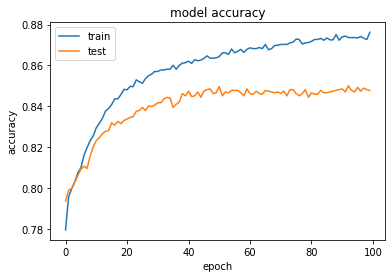

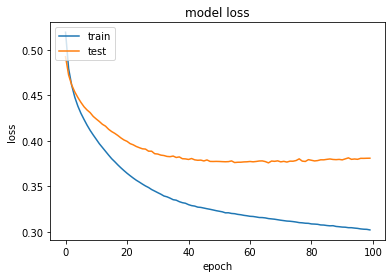

In [46]:

# list all data in history

print(model_history1.history.keys())
# summarize history for accuracy
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [47]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [48]:
cm

array([[1491,  104],
       [ 194,  211]])

In [49]:
score

0.851

In [54]:
#Now let's do trails on our model
# Initialising the ANN
classifier2 = Sequential()

# Adding the input layer and the first hidden layer
classifier2.add(Dense(units= 36, kernel_initializer='he_normal', activation='relu', input_dim = 11))
classifier2.add(Dropout(0.3))
# Adding the second hidden layer
classifier2.add(Dense(units= 20,kernel_initializer= 'he_normal',activation='relu'))
classifier2.add(Dropout(0.4))
# Adding the third hidden layer
classifier2.add(Dense(units= 15, kernel_initializer= 'he_normal',activation='relu'))
classifier2.add(Dropout(0.2))
# Adding the output layer
classifier2.add(Dense(units=  1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history1=classifier2.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.6094 - accuracy: 0.7160 - val_loss: 0.4694 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4933 - accuracy: 0.7960 - val_loss: 0.4581 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4676 - accuracy: 0.8000 - val_loss: 0.4374 - val_accuracy: 0.8012
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4587 - accuracy: 0.8011 - val_loss: 0.4390 - val_accuracy: 0.8054
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4545 - accuracy: 0.8043 - val_loss: 0.4301 - val_accuracy: 0.8046
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4411 - accuracy: 0.8037 - val_loss: 0.4206 - val_accuracy: 0.8076
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4389 - accuracy: 0.8087 - val_loss: 0.4138 - val_accuracy: 0.8171

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


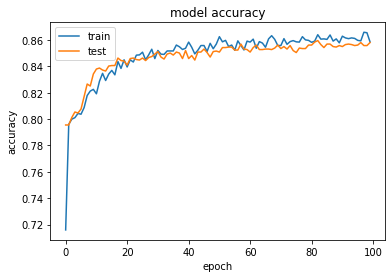

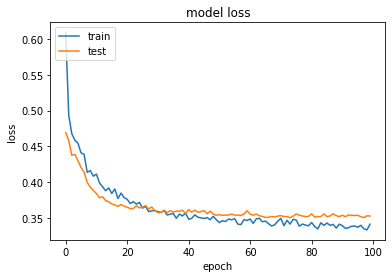

In [55]:
# list all data in history

print(model_history1.history.keys())
# summarize history for accuracy
plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier1.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [61]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier2.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [62]:
cm

array([[1537,   58],
       [ 211,  194]])

In [63]:
score

0.8655